In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [104]:
data_train = pd.read_csv("raw_data/exo_teq_results.csv")
data_test = pd.concat([
    data_train[data_train["type"] == "hot"].sample(30),
    data_train[data_train["type"] == "temperate"].sample(5),
    data_train[data_train["type"] == "cold"].sample(15)
])
data_train = data_train.drop(data_test.index)
print(len(data_train), len(data_test))
    
x_train = data_train[["st_teff", "st_rad", "pl_orbsmax"]].values
y_train = data_train["Teq"].values
x_test = data_test[["st_teff", "st_rad", "pl_orbsmax"]].values
y_test = data_test["Teq"].values



326 50


In [105]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [106]:
y_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R^2 Score: {r2:.3f}")
print(len(y_pred))

Test RMSE: 437.07
Test R^2 Score: 0.366
50


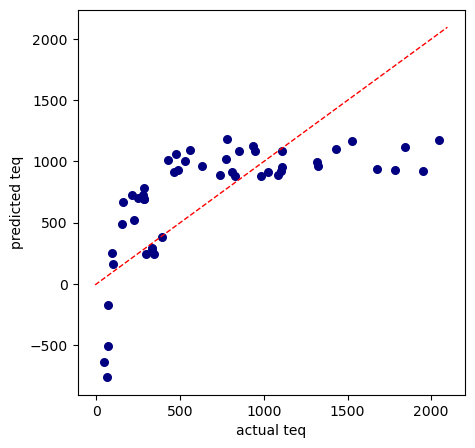

In [107]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, y_pred, color = "navy", s=30)
plt.plot([min(y_test)-50, max(y_test)+50], [min(y_test)-50, max(y_test)+50], "r--", linewidth = 1)
plt.xlabel("actual teq")
plt.ylabel("predicted teq")
plt.show()